<a href="https://colab.research.google.com/github/44REAM/CEB-image_processing/blob/main/Image_registration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Registration
---

Slide Aj Ratchainan 1-3

In [ ]:
!git clone https://github.com/44REAM/CEB-image_processing.git
%cd /content/CEB-image_processing

!pip install SimpleITK


Cloning into 'CEB-image_processing'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 301 (delta 94), reused 133 (delta 77), pack-reused 139
Receiving objects: 100% (301/301), 25.17 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (166/166), done.
/content/CEB-image_processing
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cv2
from copy import deepcopy
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('data/ct.jpeg')
print(f"image shape: {img.shape}")

ct_image = img[:,:,0]

image shape: (630, 522, 3)


# Image registration

Resources

- https://medium.com/data-breach/introduction-to-feature-detection-and-matching-65e27179885d
- https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html
- https://pubmed.ncbi.nlm.nih.gov/22435355/
- https://www.analyticsvidhya.com/blog/2021/06/feature-detection-description-and-matching-of-images-using-opencv/
- https://www.geeksforgeeks.org/feature-detection-and-matching-with-opencv-python/

## Features-based vs intensity-based

Features-based
- Features-based method try to find the transformation that minimize the distance between features that extracted from the images. 
- Features-based are used when the **local informations** are importance than the information in the image intensities ( corners, edge).
- Usually local

Intensity-based
- amount of preprocessing or userinteraction required is usually less than point-based methods.
- search for the geometric transformation that, minimises or maximises a similarity measure (also known as cost function) between two image.
- Usually global

A methodology is classified as global, if all voxels presented in the region of the interest (ROI) are used. On the other hand, it is classified as local, if only a part of the voxels in the ROI is used.

## Features

### Harris Corner

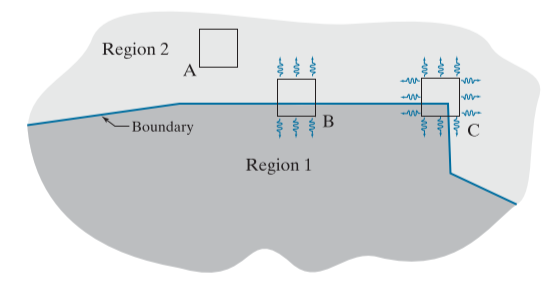

$$E = \sum_{x, y} w(x, y) [f(x+v, y+u) - f(x,y)]^2$$

Where $w(x, y )$ is weight function which can be
- 1 inside the patch and 0 elsewhere
- other function such as exponential function

After approximate by taylor expansion, the equation can be written in matrix form

$$E = \begin{bmatrix}
u & v
\end{bmatrix} M 
\begin{bmatrix}
u \\
v
\end{bmatrix}$$

Where

$$M = \sum_{x,y} w(x, y)A$$

$$A = \begin{bmatrix}
f_x^2 & f_xf_y\\
f_xf_y & f_y^2
\end{bmatrix}$$

$f_x = ∂f/∂x, f_y = ∂f/∂y$

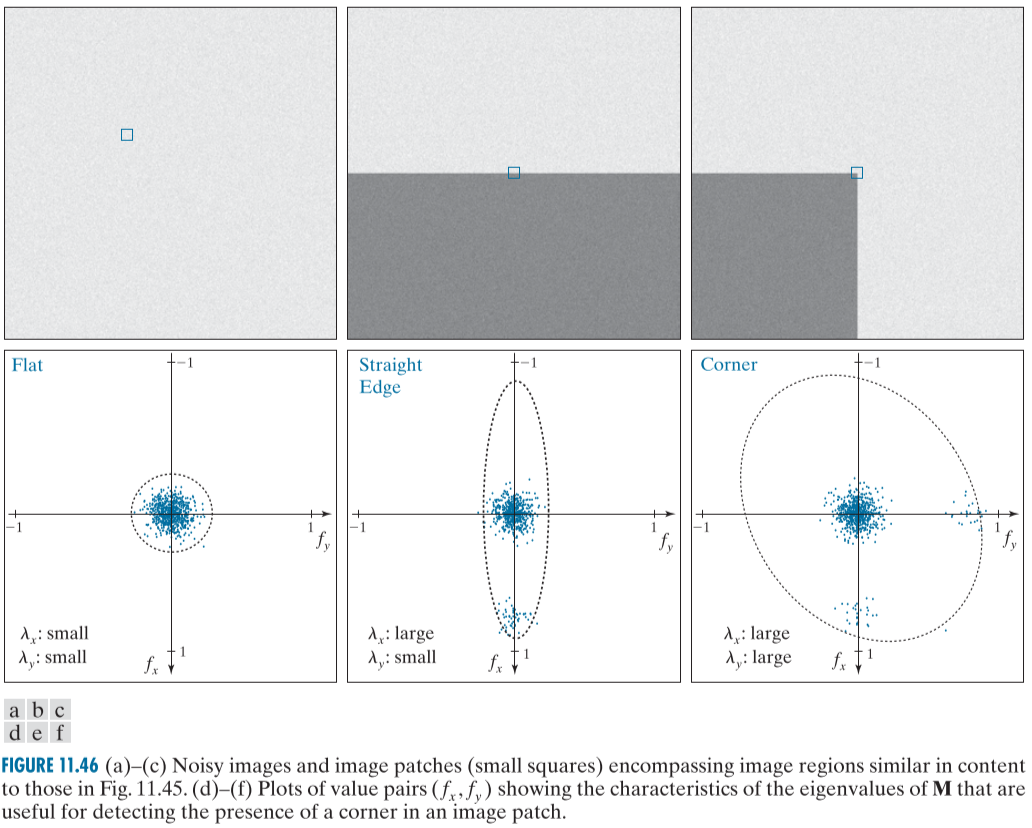

$$R = λ_1λ_2 - k (λ_1 + λ_2)^2 $$
$$R = \text{det}(M) - k \text{Tr}(M)^2 $$

You can interpret k as a “sensitivity factor;” the smaller it is, the more likely the detector is to find corners.

image.png

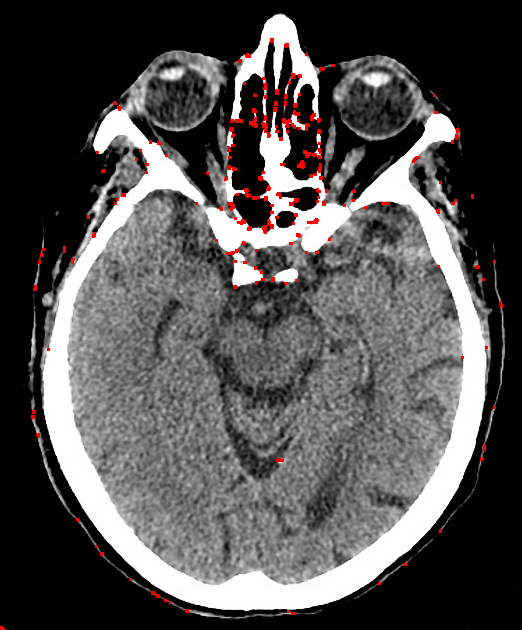

In [ ]:


dst = cv2.cornerHarris(ct_image,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

ct_image_copy = deepcopy(img)
T = 0.01*dst.max()
ct_image_copy[dst>T]=[0,0,255]
cv2_imshow(ct_image_copy)


### Scale-invariant feature transform (SIFT)

For haris-conner detector the conner may not be the conner when image is scaled. 

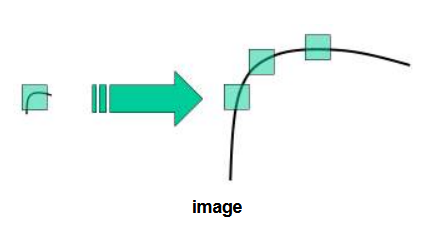

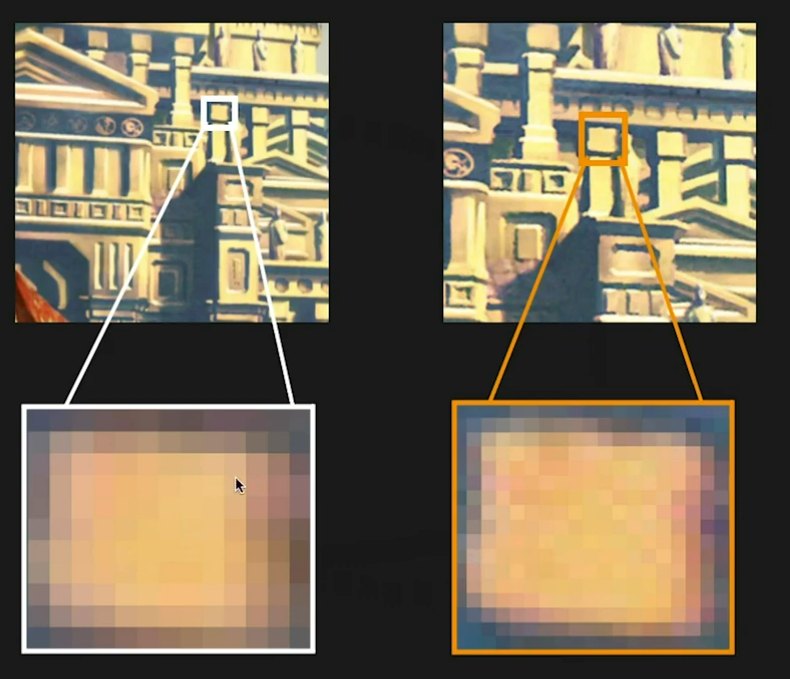

SIFT algorithm can extract features which invariant to scaling. SIFT also compute both keypoints and descriptor unlike harris-conner that compute only keypoints.

#### 1D keypoints detection

In [ ]:
from scipy import signal

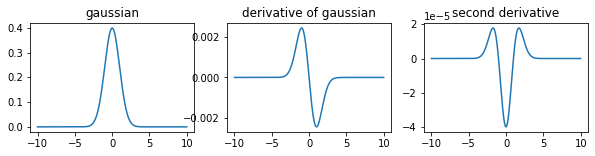

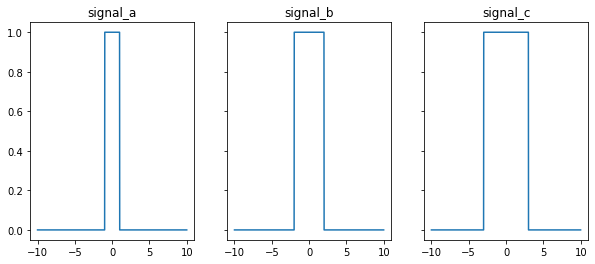

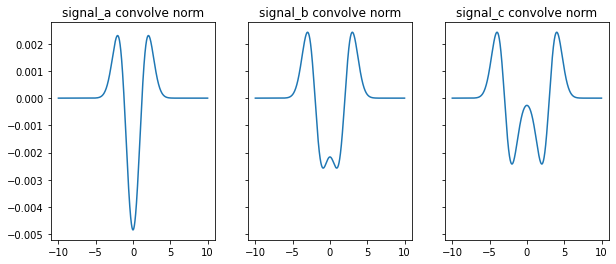

In [ ]:
x_data = np.arange(-10, 10, 0.01)
sigma = 1
gaussian = stats.norm.pdf(x_data, 0, sigma)
gaussian_diff = np.diff(gaussian, append = [gaussian[-1]])
gaussian_2diff = np.diff(gaussian_diff, append = [gaussian_diff[-1]])

fig, axes = plt.subplots(1, 3, figsize = (10,2))
axes[0].title.set_text("gaussian")
axes[0].plot(x_data, gaussian)
axes[1].title.set_text("derivative of gaussian")
axes[1].plot(x_data, gaussian_diff)
axes[2].title.set_text("second derivative")
axes[2].plot(x_data, gaussian_2diff)
plt.show()

signal_a = np.zeros(len(x_data))
signal_a[900:1100] = 1
signal_b = np.zeros(len(x_data))
signal_b[800:1200] = 1
signal_c = np.zeros(len(x_data))
signal_c[700:1300] = 1

c_signal_a = signal.convolve(signal_a, gaussian_2diff, mode = 'same')
c_signal_b = signal.convolve(signal_b, gaussian_2diff, mode = 'same')
c_signal_c = signal.convolve(signal_c, gaussian_2diff, mode = 'same')

fig, axes = plt.subplots(1, 3, figsize = (10,4), sharey= True)
axes[0].title.set_text("signal_a")
axes[0].plot(x_data, signal_a)
axes[1].title.set_text("signal_b")
axes[1].plot(x_data, signal_b)
axes[2].title.set_text("signal_c")
axes[2].plot(x_data, signal_c)

fig, axes = plt.subplots(1, 3, figsize = (10,4), sharey= True)
axes[0].title.set_text("signal_a convolve")
axes[0].plot(x_data, c_signal_a)
axes[1].title.set_text("signal_b convolve")
axes[1].plot(x_data, c_signal_b)
axes[2].title.set_text("signal_c convolve" )
axes[2].plot(x_data, c_signal_c)
plt.show()

fig, axes = plt.subplots(1, 3, figsize = (10,4), sharey= True)
axes[0].title.set_text("signal_a convolve norm")
axes[0].plot(x_data , c_signal_a* sigma**2)
axes[1].title.set_text("signal_b convolve norm")
axes[1].plot(x_data , c_signal_b* sigma**2)
axes[2].title.set_text("signal_c convolve norm" )
axes[2].plot(x_data , c_signal_c* sigma**2)
plt.show()

We try to find sigma that give local extrema in the normalized reponse signal

image.png

Objective


for 1d signal $f(x)$, find
$$ (x, σ) = argmax_{x, σ} |σ^2 \frac{∂^2n_σ}{∂x^2} * f(x) | $$

for $x$ is keypoint position and $\sigma$ is keypoint size



#### 2d keypoints detection

Using the same concept we find keypoints in 2D signal by

$$ (x, y, σ) = argmax_{x, y, σ} |σ^2 ∇^2n_σ * f(x, y) | $$

for $f(x,y)$ is pixel intensity

However, SIFT estimate the normalized response signal using calculation algorithm that more efficient than convolution.

**Difference of Gaussian (DoG)**

$$DoG = (n_{sσ} - n_σ) ≈ (s-1)σ^2 ∇^2 n_σ$$

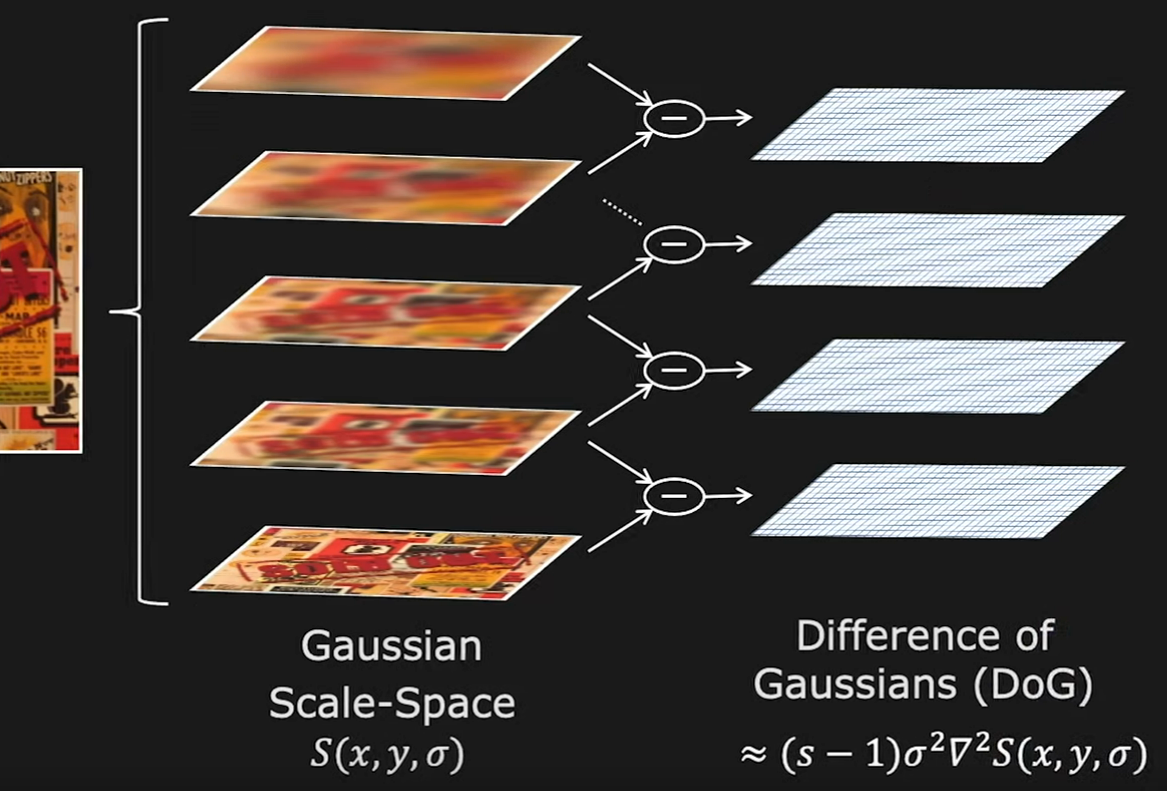

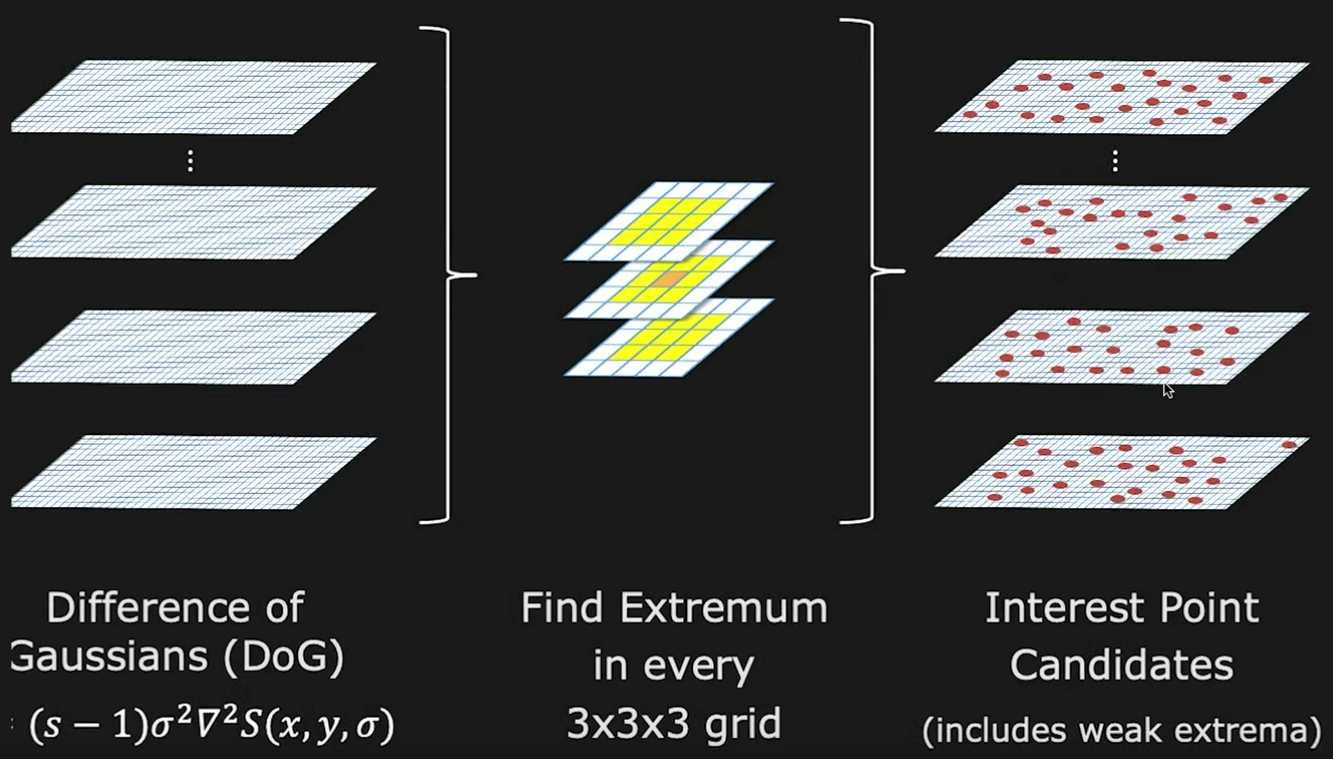

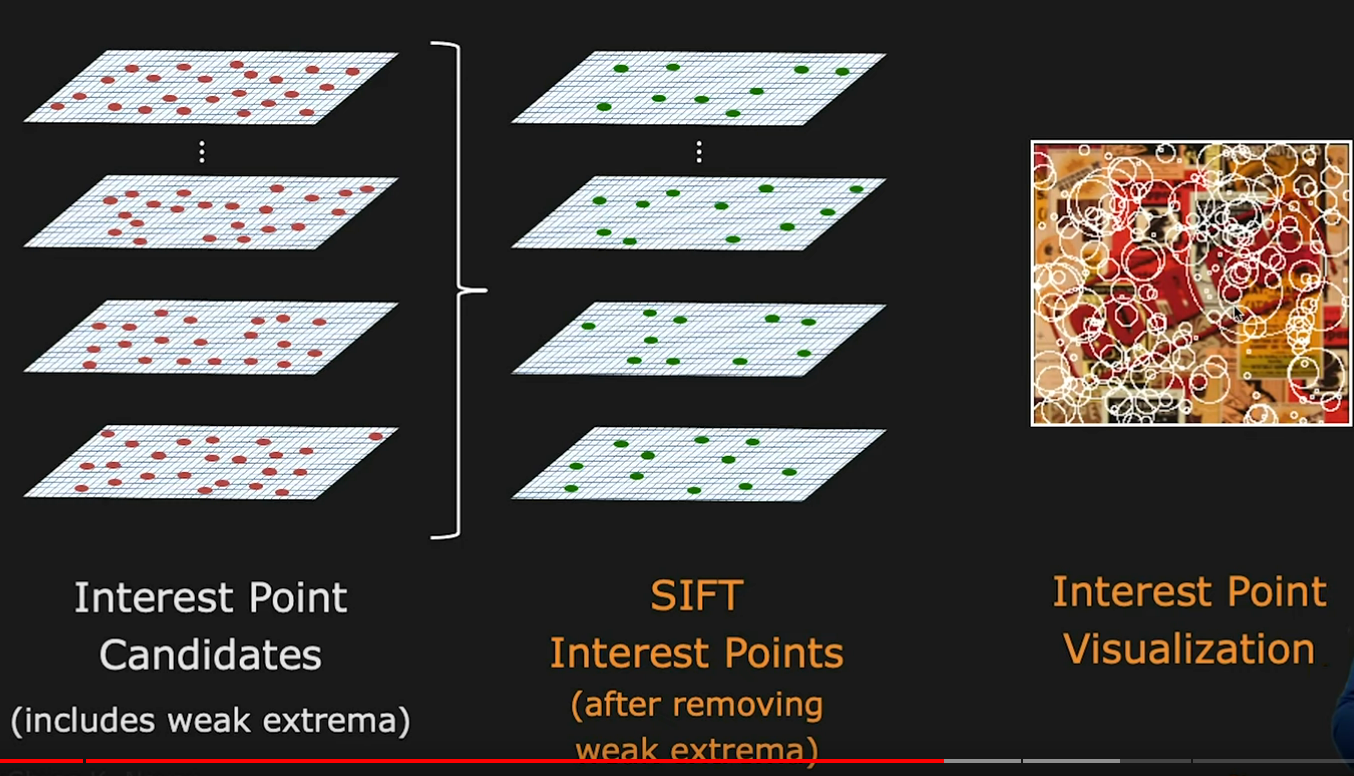

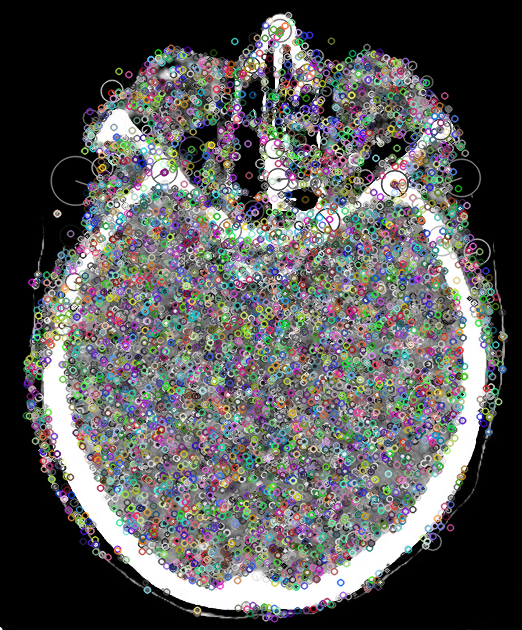

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(ct_image, None)

sift_image = cv2.drawKeypoints(ct_image, keypoints, img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# show the image
cv2_imshow(sift_image)


### ORB (Oriented FAST and Rotated BRIEF)

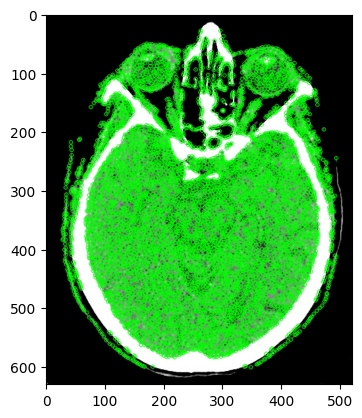

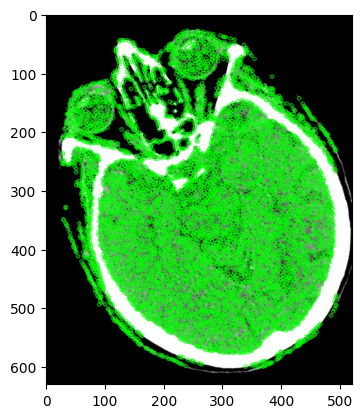

In [ ]:
# create test image
rotation_matrix = cv2.getRotationMatrix2D((ct_image.shape[1]/2, ct_image.shape[0]/2), 30, 1)
ct_test = cv2.warpAffine(ct_image, rotation_matrix, (ct_image.shape[1], ct_image.shape[0]))


fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()


train_keypoints = fast.detect(ct_image, None)
test_keypoints = fast.detect(ct_test, None)

train_keypoints, train_descriptor = brief.compute(ct_image, train_keypoints)
test_keypoints, test_descriptor = brief.compute(ct_test, test_keypoints)

key_train_image = np.copy(ct_image)
key_train_image = cv2.drawKeypoints(ct_image, train_keypoints, key_train_image, color = (0, 255, 0))

key_test_image = np.copy(ct_test)
key_test_image = cv2.drawKeypoints(ct_test, test_keypoints, key_test_image, color = (0, 255, 0))


plt.imshow(key_train_image)
plt.show()
plt.imshow(key_test_image)
plt.show()

## Features Matching

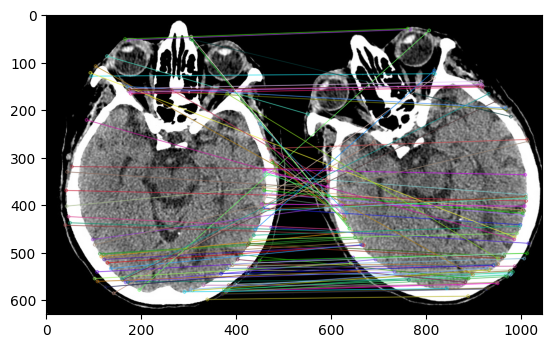

In [ ]:
num_keypoints = 100

# Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Match two descriptor
matches = bf.match(train_descriptor, test_descriptor)

# sort matching distance
matches = sorted(matches, key = lambda x : x.distance)

# use only some match
matches = matches[:num_keypoints]

result = cv2.drawMatches(ct_image, train_keypoints, ct_test, test_keypoints, matches, ct_test, flags = 2)
plt.imshow(result)
plt.show()

## Image alignment

### Least square method

Given a set of matched points $\{ x_i, \hat{x_i} \}$ and a transformation $f$ with parameter $p$ for $x' = f(x;p)$, we want to minimized the sum of squared residuals.

$$E = \sum_i || f(x_i;p) - \hat{x_i} ||^2$$

$$E = \sum_i || r_i ||^2$$

for $r_i = f(x_i;p) - \hat{x_i}$



### Robust least squares and RANSAC

Least square is the choice where noise follows a normal distribution. If the noise follow wide range of distribution,  it is preferable to use an M-estimator, which involves applying a robust penalty function ρ(r) to the residuals. We can write robust least square by the equation below.

$$E = \sum_i ρ(|| r_i ||)$$

One way to define function $ρ$ is introduce a weight function.

$$E = \sum_i w(||r_i||)|| r_i ||^2$$

The equation above is called iteratively reweighted least squares (IRLS).


While M-estimators can definitely help reduce the influence of outliers, in some cases, starting with too many outliers will prevent IRLS (or other gradient descent algorithms) from converging to
the global optimum. A better approved is to introduce another algorithm such as RANSAC which normally used in practice.

https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

## Intensity-based registration

https://simpleitk.readthedocs.io/en/master/registrationOverview.html

https://readthedocs.org/projects/simpleitk/downloads/pdf/release/

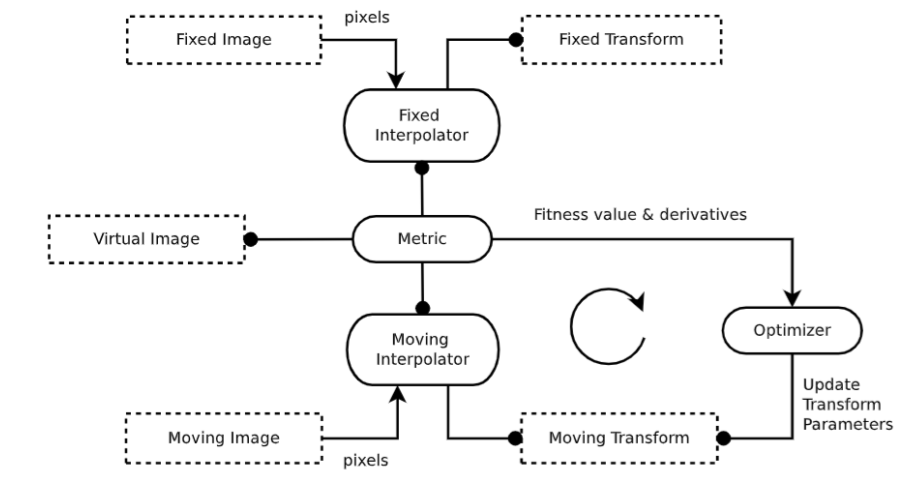

## Similarity metrics

Compare to machine learning, you can view this as **loss function**.

- least square

- Correlation



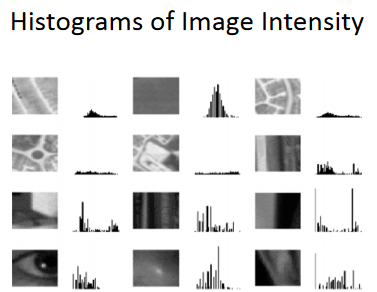

- Mutual Information

$$I(X;Y)=∑_{x,y} P(x,y) × log \frac{P(x,y)}{P(x)P(y)}$$

## Transformation

Compare to machine learning you can view this as **model**.

- Rigid transformation
- Affine transformation
- Non-linear transformation: B-Spline, Displacement field

(256, 256) (256, 256)


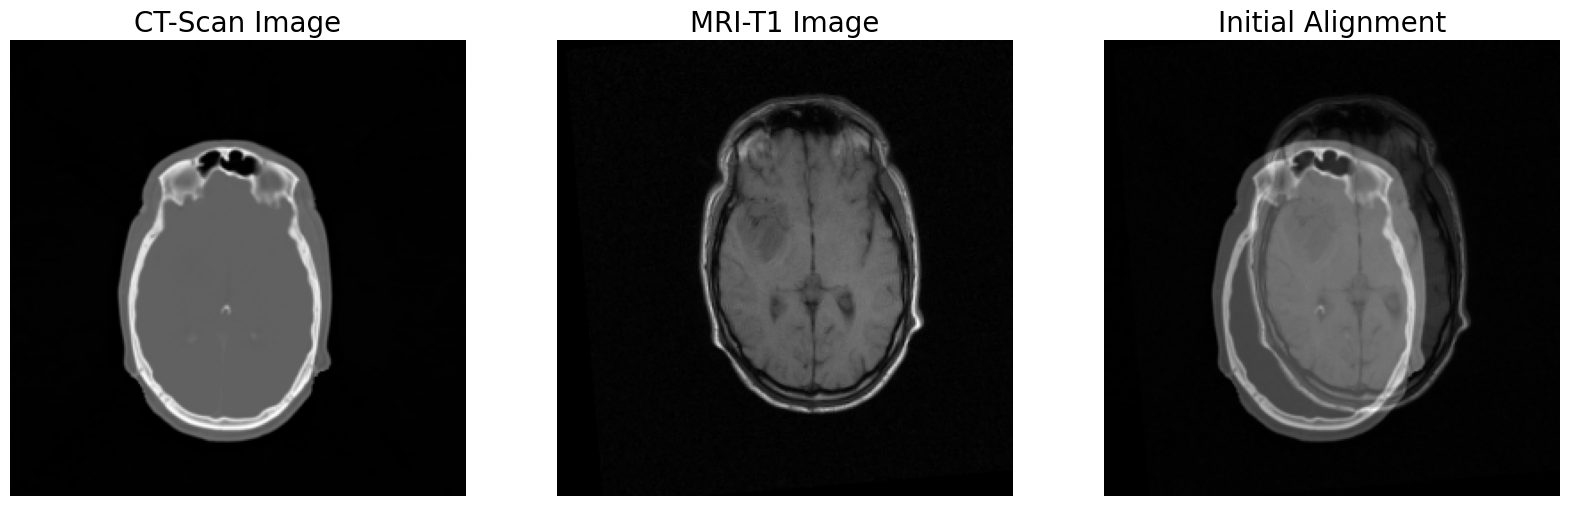

In [ ]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

fixed_image =  sitk.ReadImage("data/ct_scan_11.jpg", sitk.sitkFloat32)
moving_image = sitk.ReadImage("data/mr_T1_06.jpg", sitk.sitkFloat32) 

fixed_image_array = sitk.GetArrayFromImage(fixed_image)
moving_image_array = sitk.GetArrayFromImage(moving_image)
print(fixed_image_array.shape, moving_image_array.shape)
plt.figure(figsize=(20,10))
plt.gray()
plt.subplot(131), plt.imshow(fixed_image_array), plt.axis('off'), plt.title('CT-Scan Image', size=20)
plt.subplot(132), plt.imshow(moving_image_array), plt.axis('off'), plt.title('MRI-T1 Image', size=20)
plt.subplot(133), plt.imshow(0.6*fixed_image_array + 0.4*moving_image_array), plt.axis('off'), plt.title('Initial Alignment', size=20)
plt.show()

In [ ]:


initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Similarity2DTransform())

default_pixel = 0.0
moving_resampled = sitk.Resample(moving_image, fixed_image, initial_transform, sitk.sitkLinear, default_pixel, moving_image.GetPixelID())

fixed_image_array = sitk.GetArrayFromImage(fixed_image)
moving_image_array = sitk.GetArrayFromImage(moving_resampled)
print(fixed_image_array.shape, moving_image_array.shape)
plt.figure(figsize=(20,10))
plt.gray()
plt.subplot(131), plt.imshow(fixed_image_array), plt.axis('off'), plt.title('CT-Scan Image', size=20)
plt.subplot(132), plt.imshow(moving_image_array), plt.axis('off'), plt.title('MRI-T1 Image', size=20)
plt.subplot(133), plt.imshow(0.6*fixed_image_array + 0.4*moving_image_array), plt.axis('off'), plt.title('Initial Alignment', size=20)
plt.show()

print(initial_transform)

(256, 256) (256, 256)


itk::simple::Transform
 Similarity2DTransform (0x3cf1690)
   RTTI typeinfo:   itk::Similarity2DTransform<double>
   Reference Count: 1
   Modified Time: 2482
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 -0 
     0 1 
   Offset: [20.1729, -17.7453]
   Center: [121.112, 141.404]
   Translation: [20.1729, -17.7453]
   Inverse: 
     1 0 
     0 1 
   Singular: 0
   Angle       = 0
   Scale =1



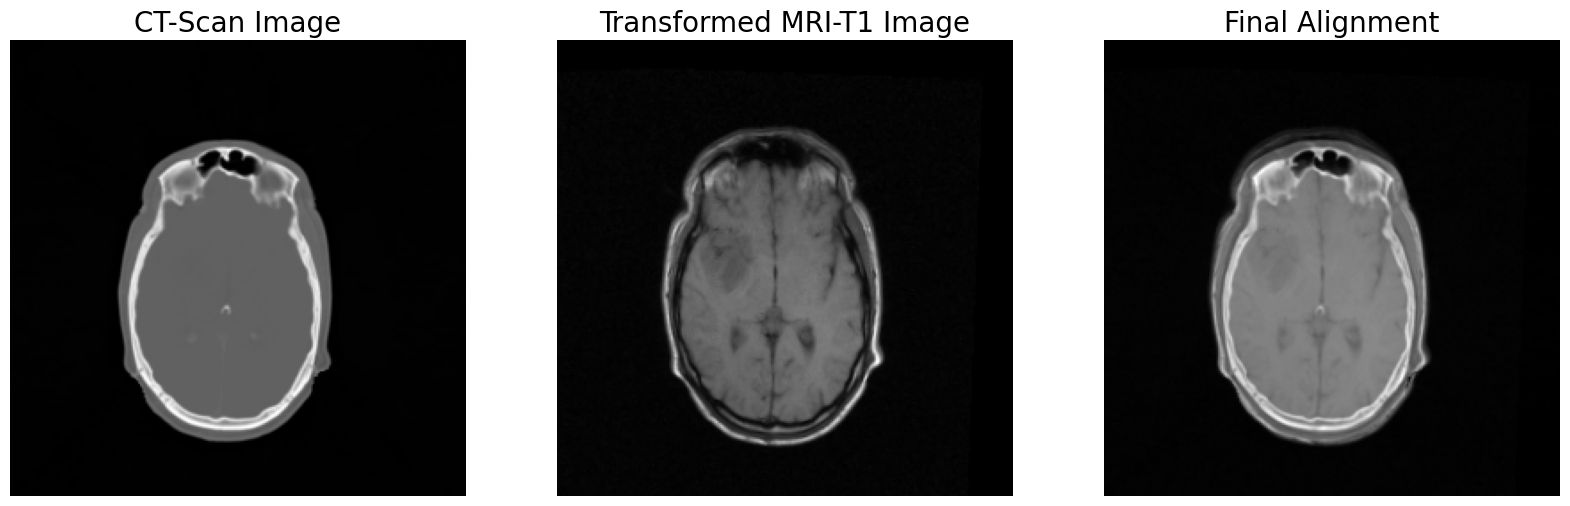

itk::simple::CompositeTransform
 CompositeTransform (0x3e0cd00)
   RTTI typeinfo:   itk::CompositeTransform<double, 2u>
   Reference Count: 1
   Modified Time: 29777
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler2DTransform (0x44dbc20)
     RTTI typeinfo:   itk::Euler2DTransform<double>
     Reference Count: 1
     Modified Time: 29623
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.999339 0.0363535 
       -0.0363535 0.999339 
     Offset: [16.2656, -13.6803]
     Center: [0, 0]
     Translation: [16.2656, -13.6803]
     Inverse: 
       0.999339 -0.0363535 
       0.0363535 0.999339 
     Singular: 0
     Angle       = -0.0363615
   End of MultiTransform.
<<<<<<<<<<
   TransformsToOptimizeFlags, begin() to end(): 
      1 
   TransformsToOptimize in queue, from begin to end:
   End of TransformsToOptimizeQueue.
<<<<<<<<<<
   End of CompositeTransform.
<<<<<<<<<<



In [ ]:

# https://buildmedia.readthedocs.org/media/pdf/simpleitk/master/simpleitk.pdf

registration_method = sitk.ImageRegistrationMethod()

## Similarity metric settings.
registration_method.SetMetricAsMeanSquares()
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)


# registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
# registration_method.SetMetricSamplingPercentage(0.01)

# set interpolator
registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# # Setup for the multi-resolution framework.            
# registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
# registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
# registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()


# registration_method.SetInitialTransform(sitk.TranslationTransform(2), inPlace=False)
# registration_method.SetInitialTransform(sitk.Euler2DTransform(), inPlace=False)
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
final_transform = registration_method.Execute(sitk.Cast(fixed_image, sitk.sitkFloat32), 
                                               sitk.Cast(moving_image, sitk.sitkFloat32))

default_pixel = 0.0
out = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, default_pixel, moving_image.GetPixelID())
moving_image_array = sitk.GetArrayFromImage(out)

plt.figure(figsize=(20,10))
plt.gray()
plt.subplot(131), plt.imshow(fixed_image_array), plt.axis('off'), plt.title('CT-Scan Image', size=20)
plt.subplot(132), plt.imshow(moving_image_array), plt.axis('off'), plt.title('Transformed MRI-T1 Image', size=20)
plt.subplot(133), plt.imshow(0.6*fixed_image_array + 0.4*moving_image_array), plt.axis('off'), plt.title('Final Alignment', size=20)
plt.show()

print(final_transform)